<center>
  <h1 style="font-family: 'Times New Roman', Times, serif; font-size: 60px;">DAA</h1>
  <h2 style="font-family: 'Times New Roman', Times, serif; font-size: 40px;">Data Exploration and Descriptive Statistics Before Pre-Processing</h2>
</center>

<h3 style="font-family: 'Times New Roman'">Import Libraries</h3>

In [1]:
# Import necessary libraries
import pandas as pd                                        # Import pandas for data manipulation and analysis
import numpy as np                                         # Import numpy for numerical computations
import matplotlib.pyplot as plt                            # Import matplotlib for data visualization
from sklearn.feature_selection import mutual_info_classif  # Import a function for mutual information classification
import seaborn as sns                                      # Import seaborn for enhanced data visualization

<h3 style="font-family: 'Times New Roman'">Load Dataset After Data Analysis</h3>

In [2]:
# Read data from the CSV file 'Drinking.csv' located in the 'Files/Data_Analysis' directory and create a new DataFrame named 'df'.
df = pd.read_csv('Files/Data_Analysis/Drinking.csv')

<h3 style="font-family: 'Times New Roman'">Data Exploration Before Pre-Processing</h3>

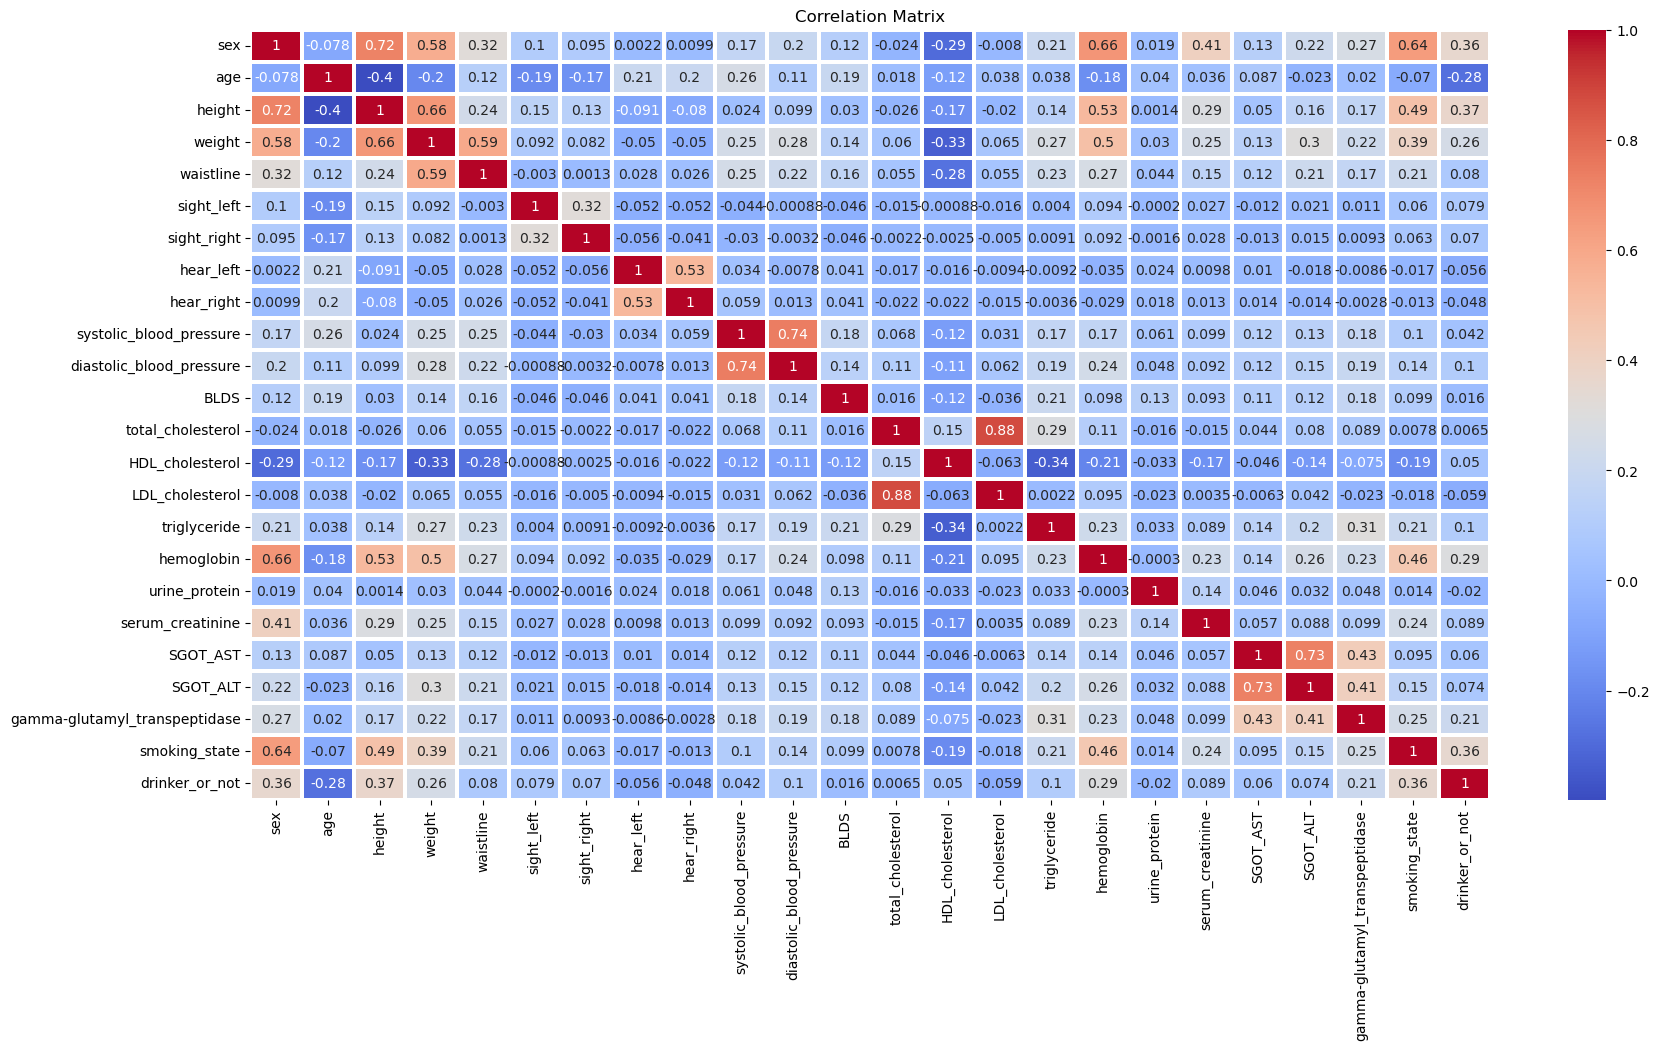

In [3]:
# Calculate the correlation matrix for the DataFrame
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1.5)
plt.title("Correlation Matrix")
plt.show()

                          Feature  Mutual_Information_Drinker
2                          height                    0.075613
22                  smoking_state                    0.069286
0                             sex                    0.065076
21  gamma-glutamyl_transpeptidase                    0.050641
16                     hemoglobin                    0.048929
1                             age                    0.042476
3                          weight                    0.039577
18               serum_creatinine                    0.015840
6                     sight_right                    0.012610
15                   triglyceride                    0.010548
20                       SGOT_ALT                    0.010053
5                      sight_left                    0.009679
4                       waistline                    0.008087
17                  urine_protein                    0.007997
10       diastolic_blood_pressure                    0.003832
8       

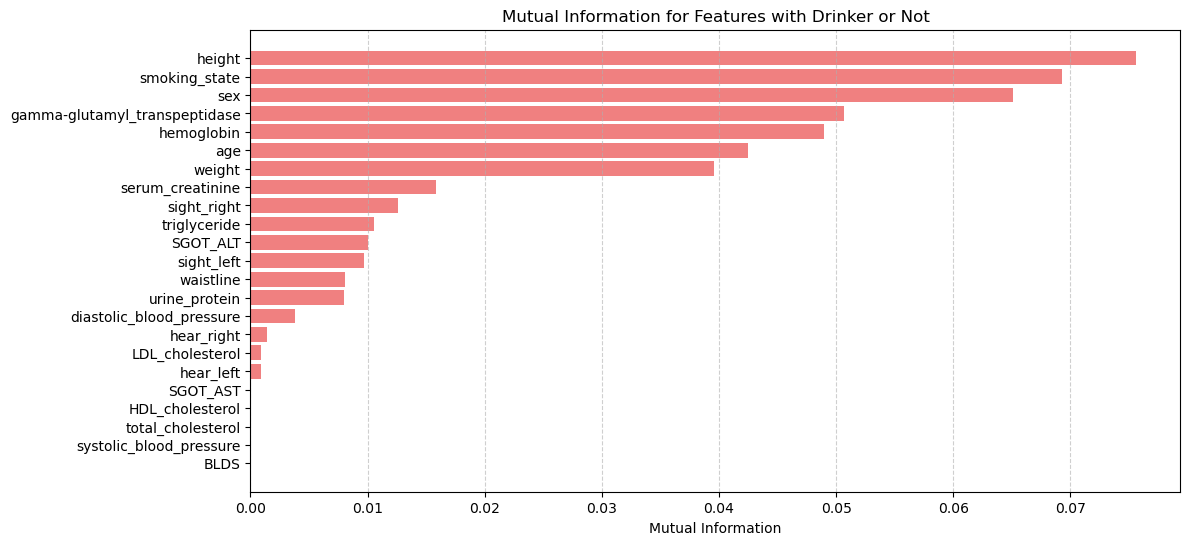

In [4]:
# Assuming 'drinker_or_not' is the target variable
target_drinker = df['drinker_or_not']

# Drop the target columns from the features
features = df.drop(['drinker_or_not'], axis=1)

# Calculate mutual information for each feature with respect to the target variables
mi_drinker = mutual_info_classif(features, target_drinker, discrete_features='auto', random_state=42)

# Create DataFrames to show the results
mi_results_drinker = pd.DataFrame({'Feature': features.columns, 'Mutual_Information_Drinker': mi_drinker})

print(mi_results_drinker.sort_values(by='Mutual_Information_Drinker', ascending=False))

# Order the features by mutual information for 'drinker_or_not'
sorted_mi_drinker = mi_results_drinker.sort_values(by='Mutual_Information_Drinker', ascending=False)

# Plot for 'drinker_or_not'
plt.figure(figsize=(12, 6))
plt.barh(sorted_mi_drinker['Feature'], sorted_mi_drinker['Mutual_Information_Drinker'], color='lightcoral')
plt.xlabel('Mutual Information')
plt.title('Mutual Information for Features with Drinker or Not')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [5]:
# Assuming 'drinker_or_not' is the target variable
target_variable = 'drinker_or_not'

# Set correlation and mutual information thresholds
correlation_threshold = 0.1
mutual_information_threshold = 0.005

# Calculate correlation matrix
correlation_matrix = df.corr()

# Calculate mutual information
mutual_info = mutual_info_classif(df, df[target_variable], discrete_features='auto', random_state=2024)

# Identify columns to drop based on thresholds
columns_to_drop = []
for column in df.columns:
    corr = abs(correlation_matrix[target_variable][column])
    mutual_info_value = mutual_info[df.columns.get_loc(column)]

    if corr < correlation_threshold and mutual_info_value < mutual_information_threshold:
        columns_to_drop.append(column)

# Drop the selected columns from the DataFrame
df = df.drop(columns=columns_to_drop)

print("Columns to Drop:", columns_to_drop)

Columns to Drop: ['hear_left', 'systolic_blood_pressure', 'BLDS', 'total_cholesterol', 'HDL_cholesterol', 'LDL_cholesterol', 'urine_protein', 'SGOT_AST', 'SGOT_ALT']


<h3 style="font-family: 'Times New Roman'"> Descriptive Statistics Before Pre-Processing</h3>

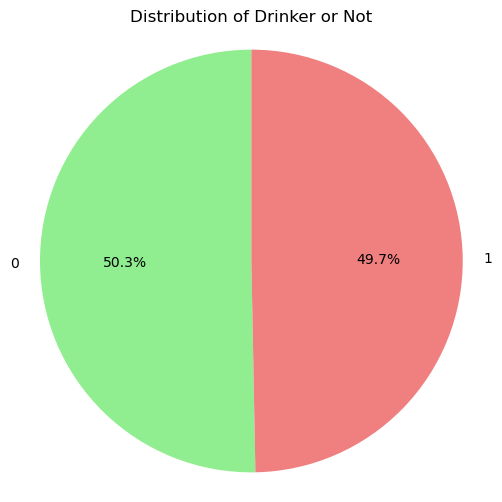

In [6]:
# Count the occurrences of each category in the 'drinker_or_not' column
drinker_counts = df['drinker_or_not'].value_counts()

# Create a pie chart to visualize the distribution of drinker_or_not
plt.figure(figsize=(6, 6))
labels = drinker_counts.index  # Assuming the categories are 'Drinker' and 'Non-Drinker'
colors = ['lightgreen', 'lightcoral']
plt.pie(drinker_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Drinker or Not')
plt.axis('equal')
plt.show()

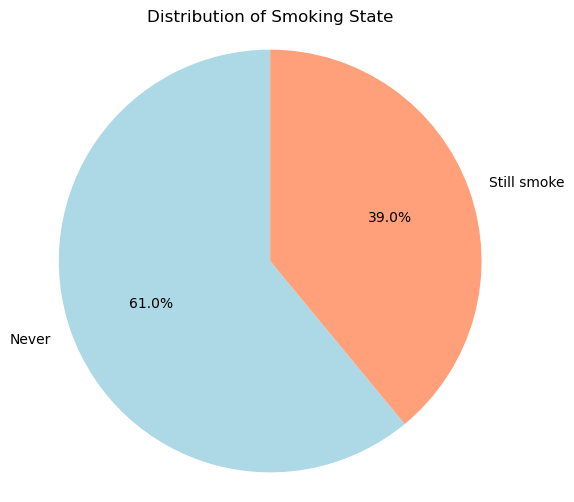

In [7]:
# Count the occurrences of each category in the 'smoking_state' column
smoking_counts = df['smoking_state'].value_counts()

# Create a pie chart to visualize the distribution of smoking_state
plt.figure(figsize=(6, 6))
labels = ['Never', 'Still smoke']
colors = ['lightblue', 'lightsalmon', 'lightgreen']
plt.pie(smoking_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Smoking State')
plt.axis('equal')
plt.show()

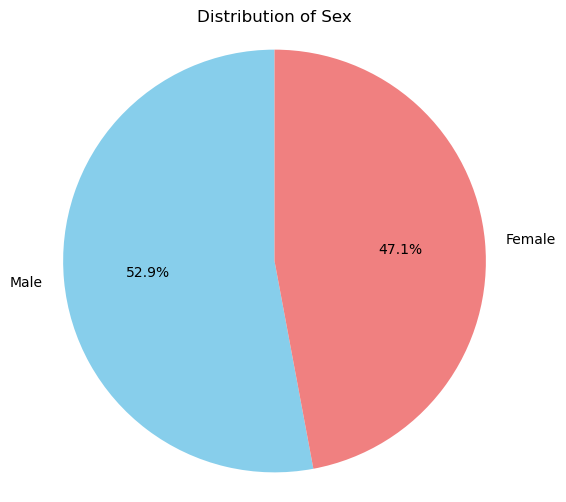

In [8]:
# Count the occurrences of each sex category in the 'sex' column
sex_counts = df['sex'].value_counts()

# Create a pie chart to visualize the distribution of sex
plt.figure(figsize=(6, 6))
labels = ['Male', 'Female']
colors = ['skyblue', 'lightcoral']
plt.pie(sex_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sex')
plt.axis('equal')
plt.show()

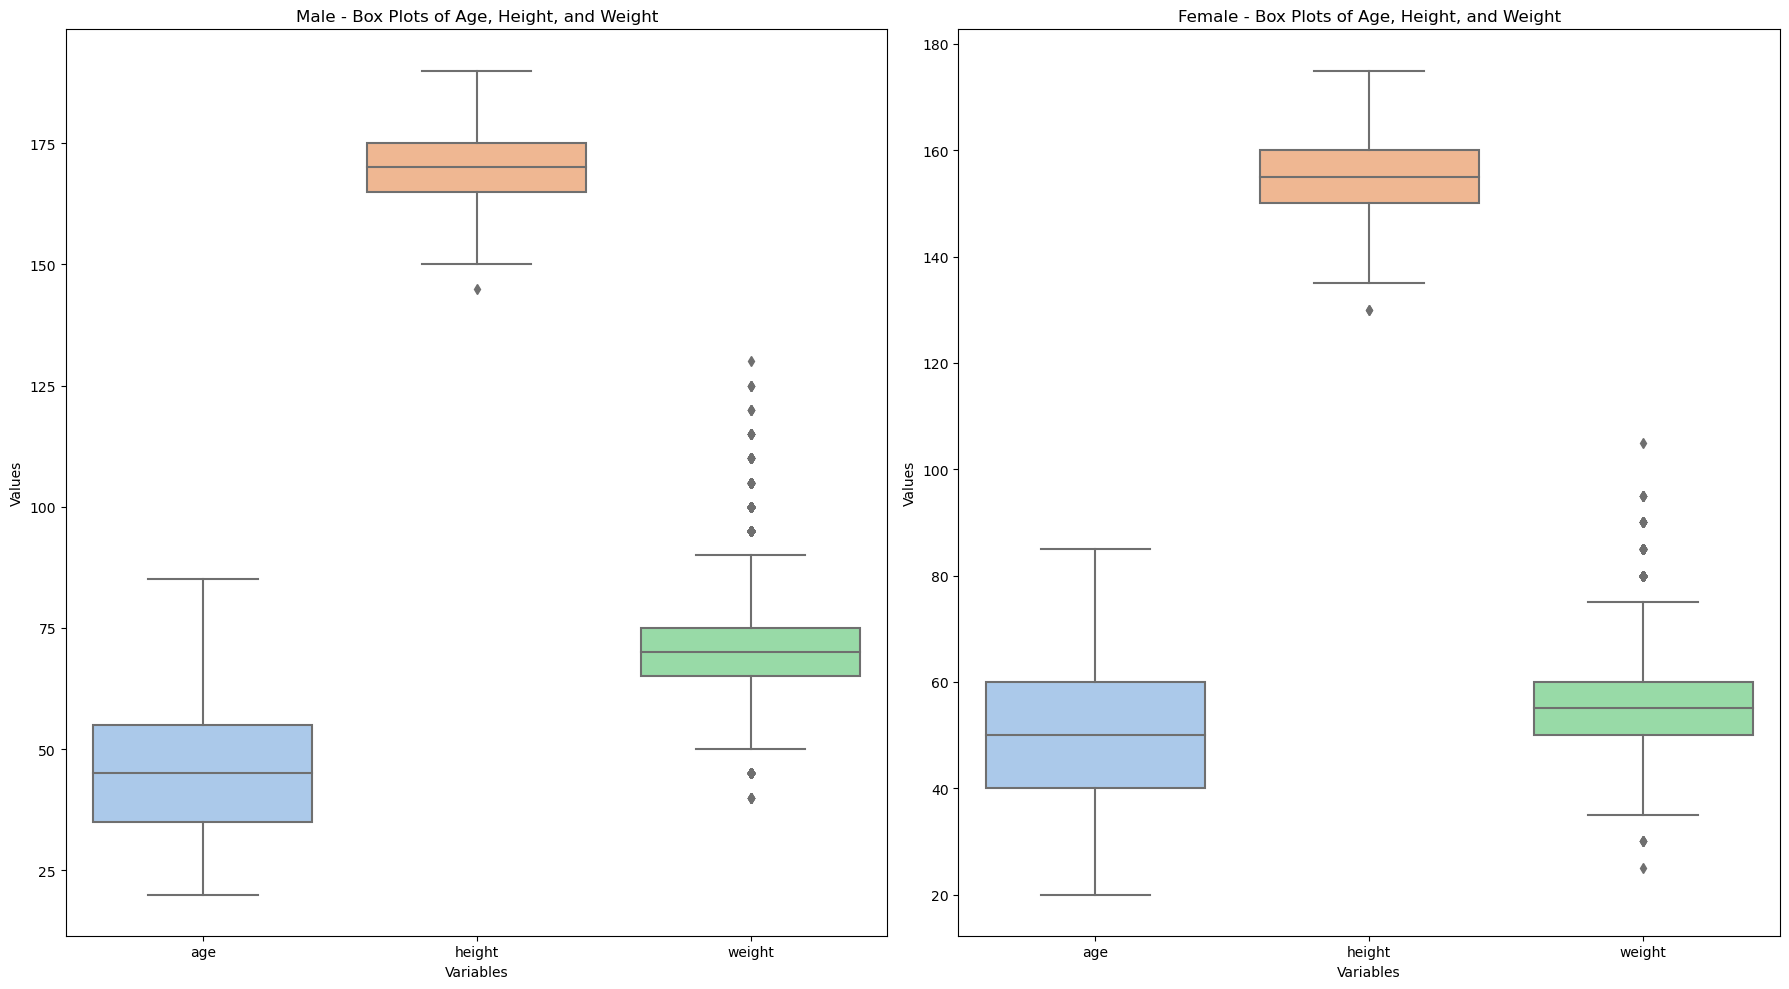

In [9]:
# Filter DataFrame for male (sex=1)
male_df = df[df['sex'] == 1]

# Create box plots for male
plt.figure(figsize=(18, 10))
plt.subplot(1, 2, 1)
sns.boxplot(x='variable', y='value', data=pd.melt(male_df[['age', 'height', 'weight', 'sex']], id_vars='sex'), palette='pastel')
plt.title('Male - Box Plots of Age, Height, and Weight')
plt.xlabel('Variables')
plt.ylabel('Values')

# Filter DataFrame for female (sex=0)
female_df = df[df['sex'] == 0]

# Create box plots for female
plt.subplot(1, 2, 2)
sns.boxplot(x='variable', y='value', data=pd.melt(female_df[['age', 'height', 'weight', 'sex']], id_vars='sex'), palette='pastel')
plt.title('Female - Box Plots of Age, Height, and Weight')
plt.xlabel('Variables')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

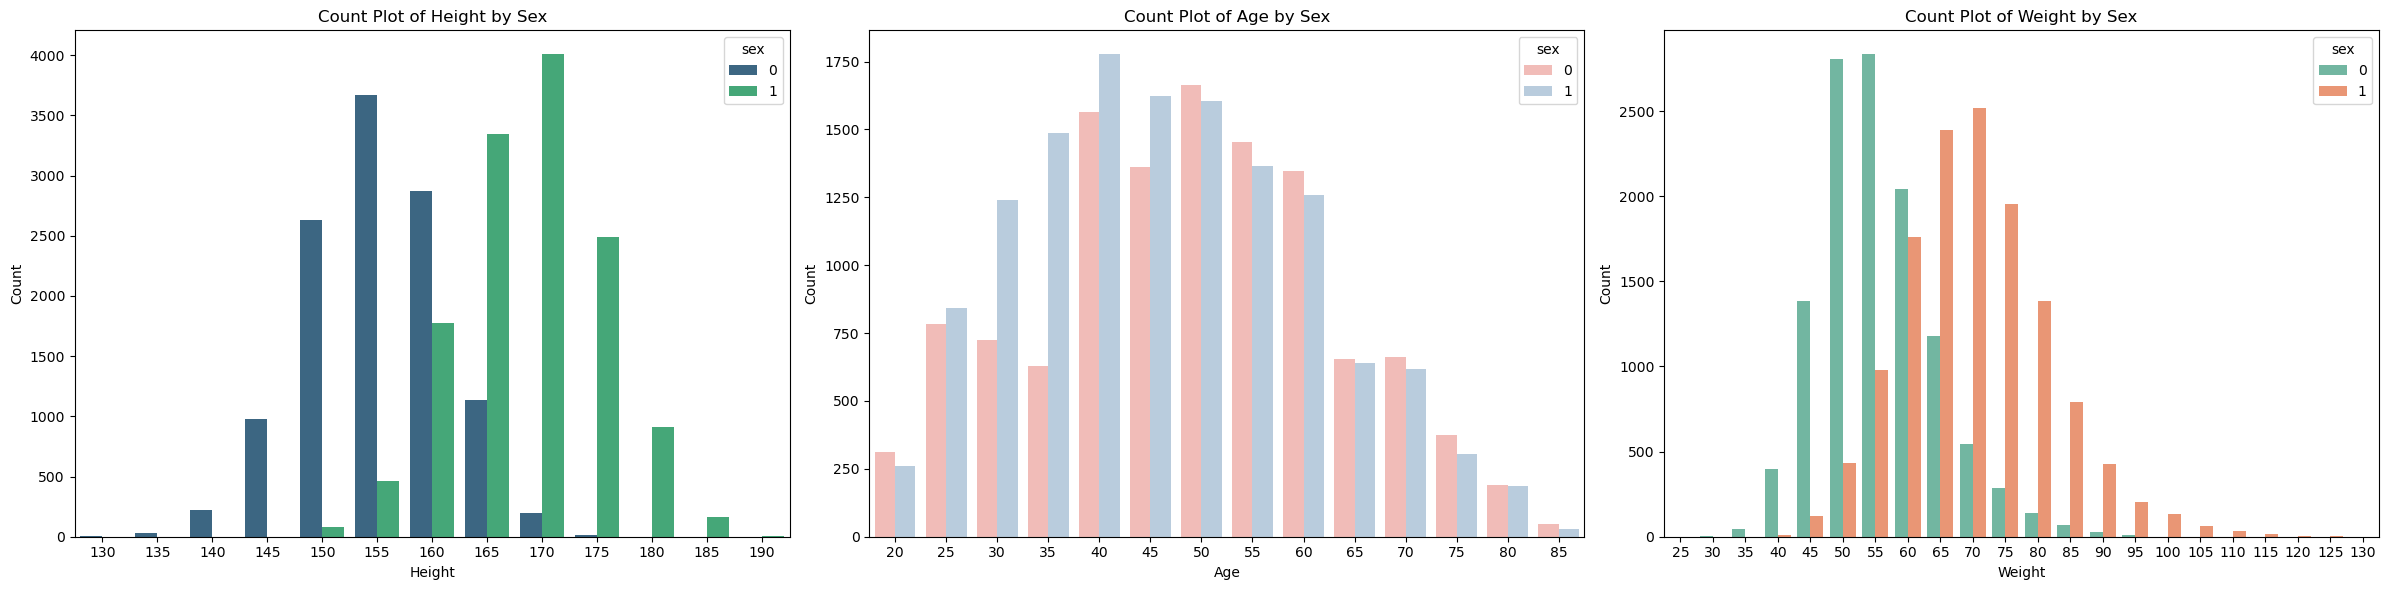

In [10]:
# Set up a 1x3 grid for subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

# Plot the first count plot
sns.countplot(x='height', hue='sex', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Count Plot of Height by Sex')
axes[0].set_xlabel('Height')
axes[0].set_ylabel('Count')

# Plot the second count plot
sns.countplot(x='age', hue='sex', data=df, palette='Pastel1', ax=axes[1])
axes[1].set_title('Count Plot of Age by Sex')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

# Plot the third count plot
sns.countplot(x='weight', hue='sex', data=df, palette='Set2', ax=axes[2])
axes[2].set_title('Count Plot of Weight by Sex')
axes[2].set_xlabel('Weight')
axes[2].set_ylabel('Count')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()

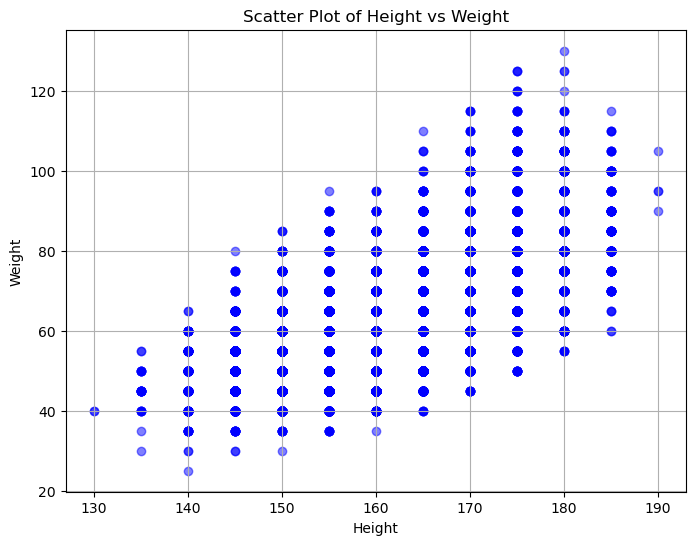

In [11]:
# Create a scatter plot to visualize the relationship between 'systolic_blood_pressure' and 'diastolic_blood_pressure'
plt.figure(figsize=(8, 6))
plt.scatter(df['height'], df['weight'], alpha=0.5, c='blue')
plt.title('Scatter Plot of Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

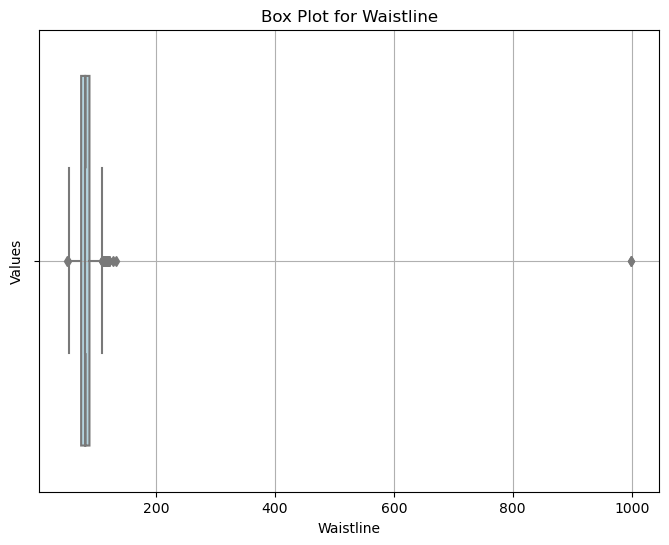

In [12]:
# Set the variable name to 'waistline'
variable_name = 'waistline'

# Create a box plot for the 'waistline' variable
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[variable_name], color='lightblue', notch=True)
plt.xlabel(f'{variable_name.capitalize()}')  # Label the x-axis with the capitalized variable name
plt.ylabel('Values')  # Label the y-axis as 'Values'
plt.title(f'Box Plot for {variable_name.capitalize()}')  # Set the title of the plot
plt.grid(True)  # Add grid lines for better readability
plt.show()  # Display the box plot

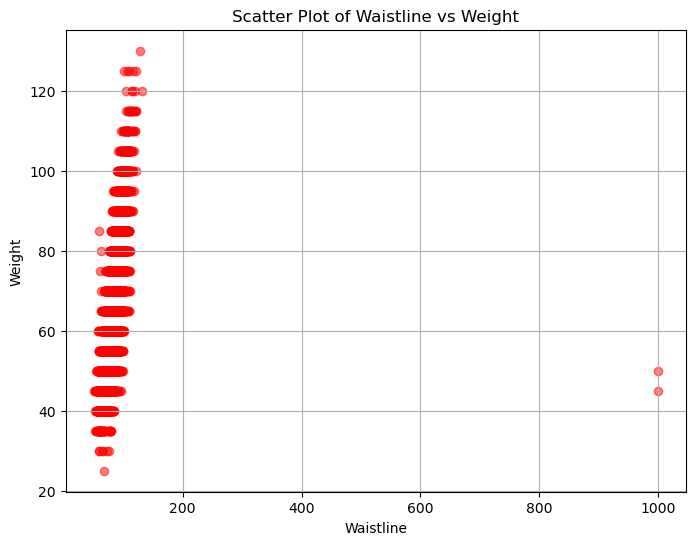

In [13]:
# Create a scatter plot with the filtered DataFrame
plt.figure(figsize=(8, 6))
plt.scatter(df['waistline'], df['weight'], alpha=0.5, c='red')
plt.title('Scatter Plot of Waistline vs Weight')
plt.xlabel('Waistline')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

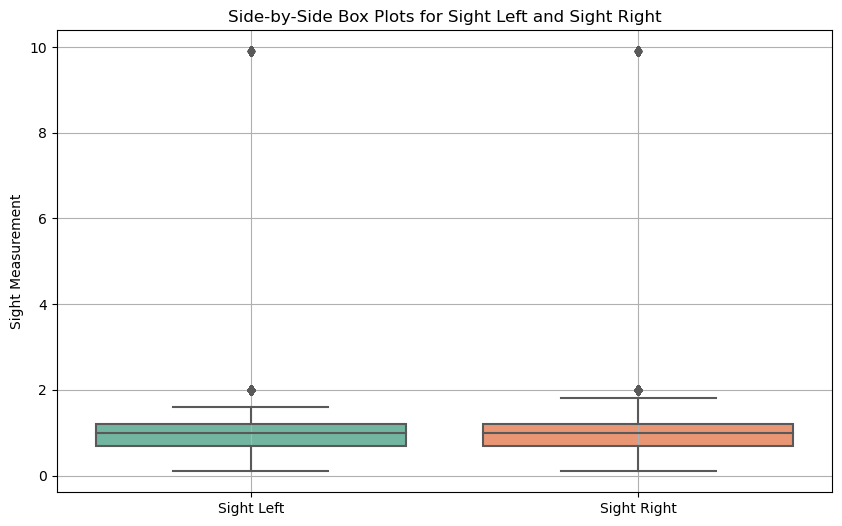

In [14]:
# Create side-by-side box plots to compare 'sight_left' and 'sight_right' measurements
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['sight_left', 'sight_right']], orient='v', palette='Set2')
plt.title('Side-by-Side Box Plots for Sight Left and Sight Right')
plt.ylabel('Sight Measurement')
plt.xticks([0, 1], ['Sight Left', 'Sight Right'])
plt.grid(True)
plt.show()

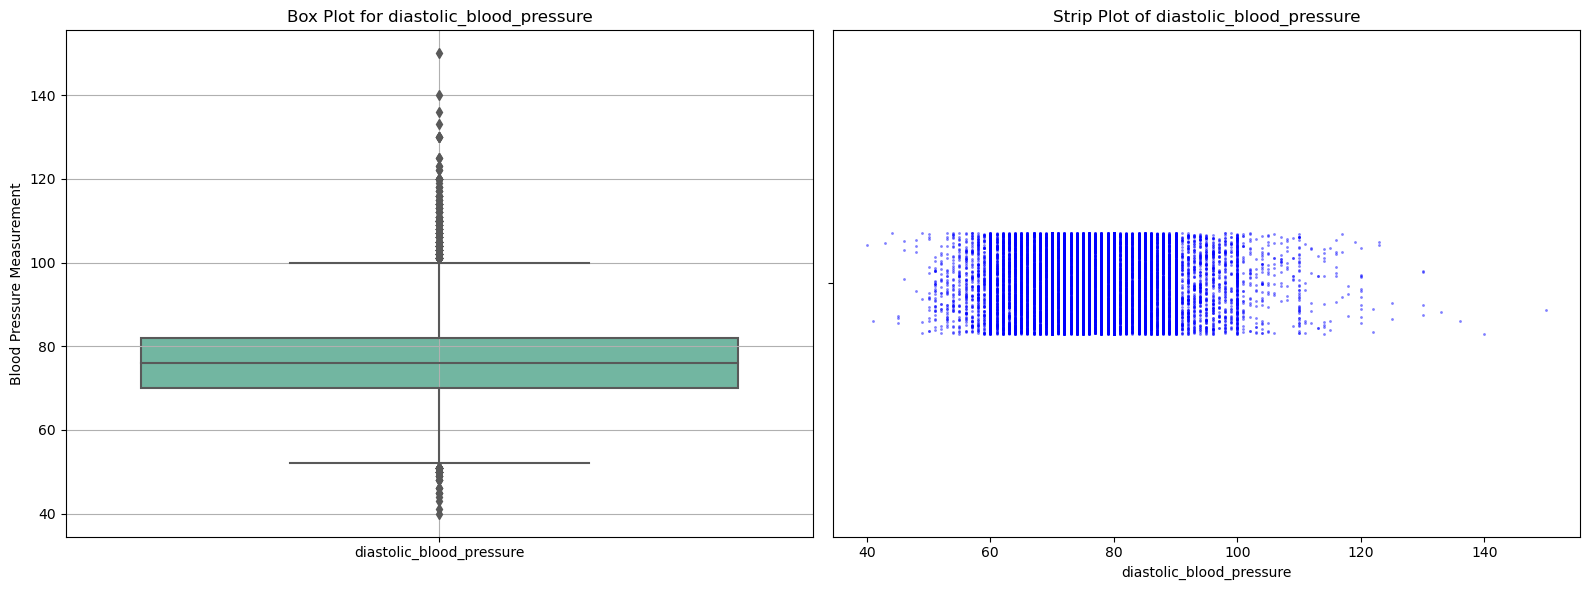

In [15]:
# Set the variable name to 'diastolic_blood_pressure'
variable_name = 'diastolic_blood_pressure'

# Create side-by-side box plots and strip plots
plt.figure(figsize=(16, 6))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(data=df[variable_name], orient='v', palette='Set2')
plt.title(f'Box Plot for {variable_name}')
plt.ylabel('Blood Pressure Measurement')
plt.xticks([0], [variable_name])
plt.grid(True)

# Strip plot
plt.subplot(1, 2, 2)
sns.stripplot(x=df[variable_name], color='blue', size=2, alpha=0.5)
plt.title(f'Strip Plot of {variable_name}')
plt.xlabel(f'{variable_name}')

plt.tight_layout()
plt.show()

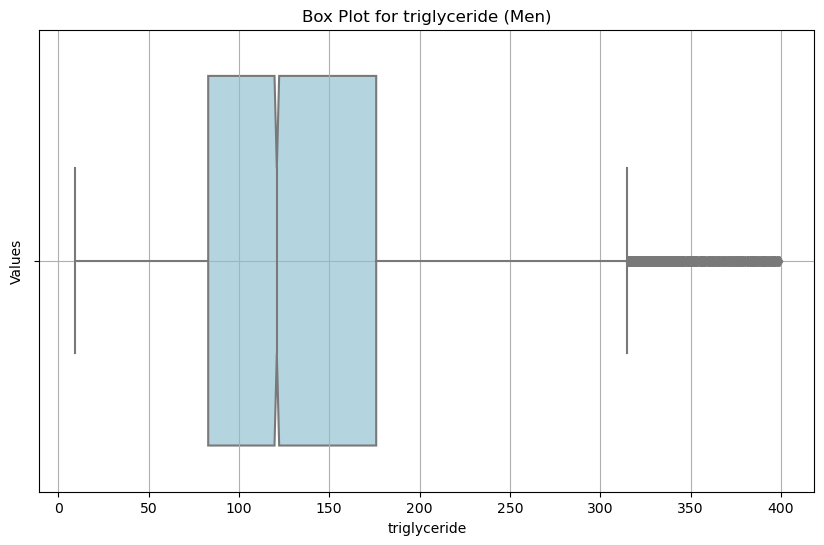

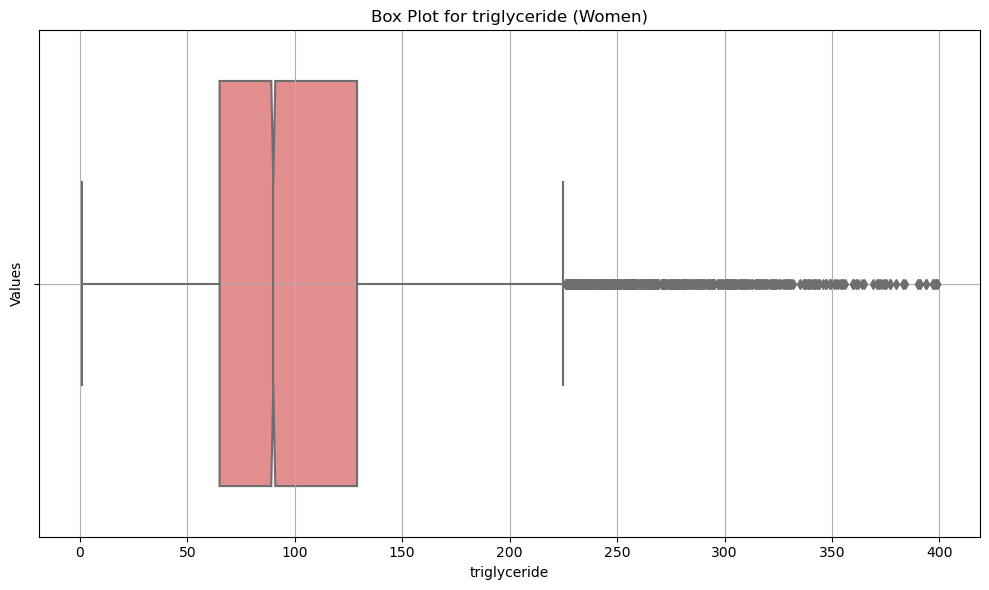

In [16]:
# Define the variable name
variable_name = 'triglyceride'

# Define colors for men and women
color_men = 'lightblue'
color_women = 'lightcoral'

# Create subplots for men
fig, axes_men = plt.subplots(1, 1, figsize=(10, 6), sharey=True)

# Create a box plot for 'triglyceride' in men
aux_men = df[(df[variable_name] < 400) & (df['sex'] == 1)]  # Filter for men
sns.boxplot(x=variable_name, data=aux_men, color=color_men, notch=True, ax=axes_men)
axes_men.set(xlabel=variable_name, ylabel='Values', title=f'Box Plot for {variable_name} (Men)')
axes_men.grid(True)

# Create subplots for women
fig, axes_women = plt.subplots(1, 1, figsize=(10, 6), sharey=True)

# Create a box plot for 'triglyceride' in women
aux_women = df[(df[variable_name] < 400) & (df['sex'] == 0)]  # Filter for women
sns.boxplot(x=variable_name, data=aux_women, color=color_women, notch=True, ax=axes_women)
axes_women.set(xlabel=variable_name, ylabel='Values', title=f'Box Plot for {variable_name} (Women)')
axes_women.grid(True)

plt.tight_layout()
plt.show()

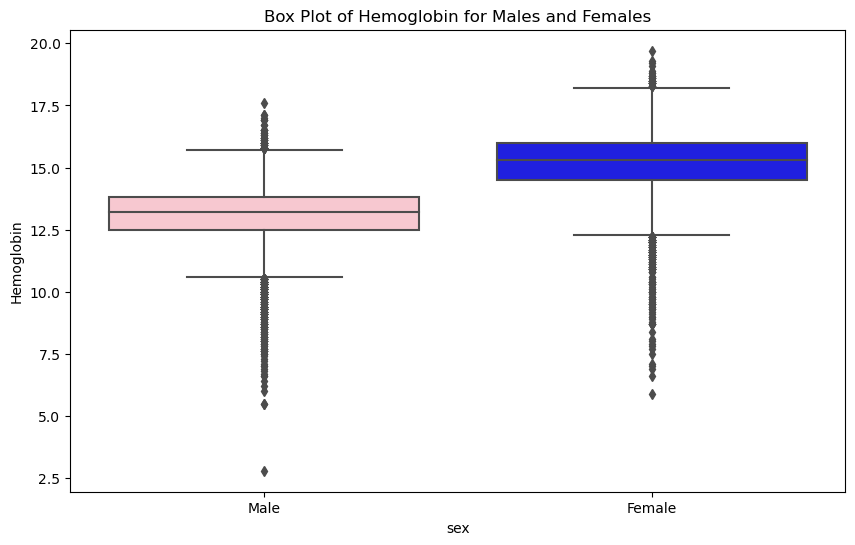

In [17]:
# Create separate DataFrames for male and female data
male_data = df[df['sex'] == 1]
female_data = df[df['sex'] == 0]

# Set up subplots with 1 row and 1 column
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# Box plot for 'hemoglobin'
sns.boxplot(x='sex', y='hemoglobin', data=df, palette={0: "pink", 1: "blue"}, ax=axes)
axes.set_title('Box Plot of Hemoglobin for Males and Females')
axes.set_ylabel('Hemoglobin')
axes.set_xticks([0, 1])
axes.set_xticklabels(['Male', 'Female'])

plt.show()


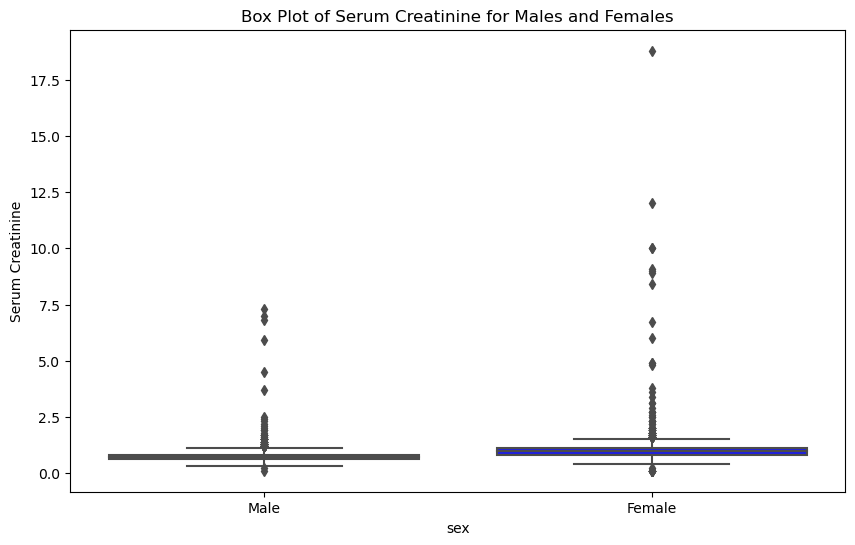

In [18]:
# Create separate DataFrames for male and female data
male_data = df[df['sex'] == 1]
female_data = df[df['sex'] == 0]

# Set up subplots with 1 row and 1 column
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# Box plot for 'serum_creatinine'
sns.boxplot(x='sex', y='serum_creatinine', data=df, palette={0: "pink", 1: "blue"}, ax=axes)
axes.set_title('Box Plot of Serum Creatinine for Males and Females')
axes.set_ylabel('Serum Creatinine')
axes.set_xticks([0, 1])
axes.set_xticklabels(['Male', 'Female'])

plt.show()

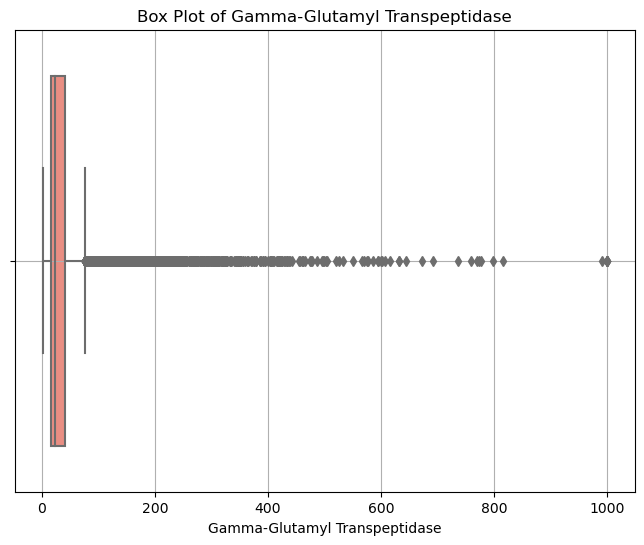

In [19]:
# Create a box plot to visualize the distribution of the 'gamma-glutamyl_transpeptidase' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['gamma-glutamyl_transpeptidase'], color='salmon')
plt.title('Box Plot of Gamma-Glutamyl Transpeptidase')
plt.xlabel('Gamma-Glutamyl Transpeptidase')
plt.grid(True)
plt.show()

<h3 style="font-family: 'Times New Roman'">Binning</h3>

In [20]:
# Number of bins
num_bins = 10

variable = 'waistline'

bins, bin_edges = pd.cut(df[variable], bins=num_bins, precision=2, retbins=True, labels=False)

# Display the intervals and counts for each bin
print(f'{variable}:')
for i in range(num_bins):
    bin_interval = f"{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}"
    count_in_bin = np.sum(bins == i)
    print(f'Bin {i+1}: {bin_interval}, Count: {count_in_bin}')

waistline:
Bin 1: 50.05 - 145.80, Count: 24998
Bin 2: 145.80 - 240.60, Count: 0
Bin 3: 240.60 - 335.40, Count: 0
Bin 4: 335.40 - 430.20, Count: 0
Bin 5: 430.20 - 525.00, Count: 0
Bin 6: 525.00 - 619.80, Count: 0
Bin 7: 619.80 - 714.60, Count: 0
Bin 8: 714.60 - 809.40, Count: 0
Bin 9: 809.40 - 904.20, Count: 0
Bin 10: 904.20 - 999.00, Count: 2


In [21]:
# Number of bins
num_bins = 10

variable = 'height'

bins, bin_edges = pd.cut(df[variable], bins=num_bins, precision=2, retbins=True, labels=False)

# Display the intervals and counts for each bin
print(f'{variable}:')
for i in range(num_bins):
    bin_interval = f"{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}"
    count_in_bin = np.sum(bins == i)
    print(f'Bin {i+1}: {bin_interval}, Count: {count_in_bin}')

height:
Bin 1: 129.94 - 136.00, Count: 33
Bin 2: 136.00 - 142.00, Count: 226
Bin 3: 142.00 - 148.00, Count: 983
Bin 4: 148.00 - 154.00, Count: 2708
Bin 5: 154.00 - 160.00, Count: 8778
Bin 6: 160.00 - 166.00, Count: 4483
Bin 7: 166.00 - 172.00, Count: 4206
Bin 8: 172.00 - 178.00, Count: 2504
Bin 9: 178.00 - 184.00, Count: 908
Bin 10: 184.00 - 190.00, Count: 171


In [22]:
# Calculate Q1, Q3, and IQR
q1 = np.percentile(df['weight'], 25)
q3 = np.percentile(df['weight'], 75)
iqr = q3 - q1

# Calculate IQR Lower Bound
iqr_lower_bound = q1 - 1.5 * iqr

print("Q1:", q1)
print("Q3:", q3)
print("IQR:", iqr)
print("IQR Lower Bound:", iqr_lower_bound)

Q1: 55.0
Q3: 70.0
IQR: 15.0
IQR Lower Bound: 32.5


In [23]:
# Number of bins
num_bins = 3

variable = 'weight'

bins, bin_edges = pd.cut(df[variable], bins=num_bins, precision=2, retbins=True, labels=False)

# Display the intervals and counts for each bin
print(f'{variable}:')
for i in range(num_bins):
    bin_interval = f"{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}"
    count_in_bin = np.sum(bins == i)    
    print(f'Bin {i+1}: {bin_interval}, Count: {count_in_bin}')

weight:
Bin 1: 24.89 - 60.00, Count: 12821
Bin 2: 60.00 - 95.00, Count: 11917
Bin 3: 95.00 - 130.00, Count: 262


In [24]:
# Number of bins
num_bins = 10

variable = 'waistline'

# Binning for the 'waistline' variable
bins, bin_edges = pd.cut(df[variable], bins=num_bins, precision=2, retbins=True, labels=False)

# Display the intervals and counts for each bin
print(f'{variable}:')
for i in range(num_bins):
    bin_interval = f"{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}"
    count_in_bin = np.sum(bins == i)
    print(f'Bin {i+1}: {bin_interval}, Count: {count_in_bin}')

waistline:
Bin 1: 50.05 - 145.80, Count: 24998
Bin 2: 145.80 - 240.60, Count: 0
Bin 3: 240.60 - 335.40, Count: 0
Bin 4: 335.40 - 430.20, Count: 0
Bin 5: 430.20 - 525.00, Count: 0
Bin 6: 525.00 - 619.80, Count: 0
Bin 7: 619.80 - 714.60, Count: 0
Bin 8: 714.60 - 809.40, Count: 0
Bin 9: 809.40 - 904.20, Count: 0
Bin 10: 904.20 - 999.00, Count: 2


In [25]:
# Number of bins
num_bins = 10

# Binning for the 'sight_left' variable
sight_left_bins, sight_left_bin_edges = pd.cut(df['sight_left'], bins=num_bins, precision=2, retbins=True, labels=False)

# Display the intervals and counts for each bin
print('Sight Left:')
for i in range(num_bins):
    bin_interval = f"{sight_left_bin_edges[i]:.2f} - {sight_left_bin_edges[i+1]:.2f}"
    count_in_bin = np.sum(sight_left_bins == i)
    print(f'Bin {i+1}: {bin_interval}, Count: {count_in_bin}')

# Binning for the 'sight_right' variable
sight_right_bins, sight_right_bin_edges = pd.cut(df['sight_right'], bins=num_bins, precision=2, retbins=True, labels=False)

# Display the intervals and counts for each bin
print('\nSight Right:')
for i in range(num_bins):
    bin_interval = f"{sight_right_bin_edges[i]:.2f} - {sight_right_bin_edges[i+1]:.2f}"
    count_in_bin = np.sum(sight_right_bins == i)
    print(f'Bin {i+1}: {bin_interval}, Count: {count_in_bin}')


Sight Left:
Bin 1: 0.09 - 1.08, Count: 16805
Bin 2: 1.08 - 2.06, Count: 8124
Bin 3: 2.06 - 3.04, Count: 0
Bin 4: 3.04 - 4.02, Count: 0
Bin 5: 4.02 - 5.00, Count: 0
Bin 6: 5.00 - 5.98, Count: 0
Bin 7: 5.98 - 6.96, Count: 0
Bin 8: 6.96 - 7.94, Count: 0
Bin 9: 7.94 - 8.92, Count: 0
Bin 10: 8.92 - 9.90, Count: 71

Sight Right:
Bin 1: 0.09 - 1.08, Count: 16958
Bin 2: 1.08 - 2.06, Count: 7959
Bin 3: 2.06 - 3.04, Count: 0
Bin 4: 3.04 - 4.02, Count: 0
Bin 5: 4.02 - 5.00, Count: 0
Bin 6: 5.00 - 5.98, Count: 0
Bin 7: 5.98 - 6.96, Count: 0
Bin 8: 6.96 - 7.94, Count: 0
Bin 9: 7.94 - 8.92, Count: 0
Bin 10: 8.92 - 9.90, Count: 83


In [26]:
# Number of bins
num_bins = 20

# Binning for the 'diastolic_blood_pressure' variable
diastolic_bins, diastolic_bin_edges = pd.cut(df['diastolic_blood_pressure'], bins=num_bins, precision=2, retbins=True, labels=False)

# Display the intervals and counts for each bin
print('Diastolic Blood Pressure:')
for i in range(num_bins):
    bin_interval = f"{diastolic_bin_edges[i]:.2f} - {diastolic_bin_edges[i+1]:.2f}"
    count_in_bin = np.sum(diastolic_bins == i)
    print(f'Bin {i+1}: {bin_interval}, Count: {count_in_bin}')

Diastolic Blood Pressure:
Bin 1: 39.89 - 45.50, Count: 7
Bin 2: 45.50 - 51.00, Count: 57
Bin 3: 51.00 - 56.50, Count: 230
Bin 4: 56.50 - 62.00, Count: 2067
Bin 5: 62.00 - 67.50, Count: 2132
Bin 6: 67.50 - 73.00, Count: 5837
Bin 7: 73.00 - 78.50, Count: 4170
Bin 8: 78.50 - 84.00, Count: 5855
Bin 9: 84.00 - 89.50, Count: 2620
Bin 10: 89.50 - 95.00, Count: 1216
Bin 11: 95.00 - 100.50, Count: 535
Bin 12: 100.50 - 106.00, Count: 129
Bin 13: 106.00 - 111.50, Count: 82
Bin 14: 111.50 - 117.00, Count: 34
Bin 15: 117.00 - 122.50, Count: 17
Bin 16: 122.50 - 128.00, Count: 4
Bin 17: 128.00 - 133.50, Count: 5
Bin 18: 133.50 - 139.00, Count: 1
Bin 19: 139.00 - 144.50, Count: 1
Bin 20: 144.50 - 150.00, Count: 1


In [27]:
# Number of bins
num_bins = 200

# Separate the DataFrame into male and female subsets
male_df = df[df['sex'] == 1]
female_df = df[df['sex'] == 0]

# Binning for 'serum_creatinine' for males
serum_creatinine_bins_male, serum_creatinine_bin_edges_male = pd.cut(male_df['serum_creatinine'], bins=num_bins, precision=2, retbins=True, labels=False)

# Binning for 'serum_creatinine' for females
serum_creatinine_bins_female, serum_creatinine_bin_edges_female = pd.cut(female_df['serum_creatinine'], bins=num_bins, precision=2, retbins=True, labels=False)

# Display the intervals and counts for each bin for males
variable_name_male = 'Serum Creatinine (Male)'
print(f'{variable_name_male}:')
for i in range(num_bins):
    bin_interval = f"{serum_creatinine_bin_edges_male[i]:.2f} - {serum_creatinine_bin_edges_male[i+1]:.2f}"
    count_in_bin = np.sum(serum_creatinine_bins_male == i)
    print(f'Bin {i+1}: {bin_interval}, Count: {count_in_bin}')

print('\n')

# Display the intervals and counts for each bin for females
variable_name_female = 'Serum Creatinine (Female)'
print(f'{variable_name_female}:')
for i in range(num_bins):
    bin_interval = f"{serum_creatinine_bin_edges_female[i]:.2f} - {serum_creatinine_bin_edges_female[i+1]:.2f}"
    count_in_bin = np.sum(serum_creatinine_bins_female == i)
    print(f'Bin {i+1}: {bin_interval}, Count: {count_in_bin}')

Serum Creatinine (Male):
Bin 1: 0.08 - 0.19, Count: 11
Bin 2: 0.19 - 0.29, Count: 1
Bin 3: 0.29 - 0.38, Count: 0
Bin 4: 0.38 - 0.47, Count: 7
Bin 5: 0.47 - 0.57, Count: 45
Bin 6: 0.57 - 0.66, Count: 215
Bin 7: 0.66 - 0.75, Count: 843
Bin 8: 0.75 - 0.85, Count: 2197
Bin 9: 0.85 - 0.94, Count: 3115
Bin 10: 0.94 - 1.04, Count: 3056
Bin 11: 1.04 - 1.13, Count: 2059
Bin 12: 1.13 - 1.22, Count: 1003
Bin 13: 1.22 - 1.32, Count: 414
Bin 14: 1.32 - 1.41, Count: 117
Bin 15: 1.41 - 1.50, Count: 50
Bin 16: 1.50 - 1.60, Count: 0
Bin 17: 1.60 - 1.69, Count: 27
Bin 18: 1.69 - 1.78, Count: 14
Bin 19: 1.78 - 1.88, Count: 15
Bin 20: 1.88 - 1.97, Count: 7
Bin 21: 1.97 - 2.06, Count: 9
Bin 22: 2.06 - 2.16, Count: 0
Bin 23: 2.16 - 2.25, Count: 2
Bin 24: 2.25 - 2.34, Count: 4
Bin 25: 2.34 - 2.44, Count: 0
Bin 26: 2.44 - 2.53, Count: 2
Bin 27: 2.53 - 2.62, Count: 1
Bin 28: 2.62 - 2.72, Count: 3
Bin 29: 2.72 - 2.81, Count: 0
Bin 30: 2.81 - 2.91, Count: 1
Bin 31: 2.91 - 3.00, Count: 0
Bin 32: 3.00 - 3.09, Coun

In [28]:
# Number of bins
num_bins = 20

# Binning for the 'gamma-glutamyl_transpeptidase' variable
ggt_bins, ggt_bin_edges = pd.cut(df['gamma-glutamyl_transpeptidase'], bins=num_bins, precision=2, retbins=True, labels=False)

# Display the intervals and counts for each bin for the 'gamma-glutamyl_transpeptidase' variable
variable_name = 'Gamma-Glutamyl Transpeptidase'
print(f'{variable_name}:')
for i in range(num_bins):
    bin_interval = f"{ggt_bin_edges[i]:.2f} - {ggt_bin_edges[i+1]:.2f}"
    count_in_bin = np.sum(ggt_bins == i)
    print(f'Bin {i+1}: {bin_interval}, Count: {count_in_bin}')

Gamma-Glutamyl Transpeptidase:
Bin 1: 1.00 - 51.85, Count: 20737
Bin 2: 51.85 - 101.70, Count: 2922
Bin 3: 101.70 - 151.55, Count: 712
Bin 4: 151.55 - 201.40, Count: 266
Bin 5: 201.40 - 251.25, Count: 148
Bin 6: 251.25 - 301.10, Count: 58
Bin 7: 301.10 - 350.95, Count: 53
Bin 8: 350.95 - 400.80, Count: 26
Bin 9: 400.80 - 450.65, Count: 28
Bin 10: 450.65 - 500.50, Count: 13
Bin 11: 500.50 - 550.35, Count: 5
Bin 12: 550.35 - 600.20, Count: 9
Bin 13: 600.20 - 650.05, Count: 6
Bin 14: 650.05 - 699.90, Count: 2
Bin 15: 699.90 - 749.75, Count: 1
Bin 16: 749.75 - 799.60, Count: 5
Bin 17: 799.60 - 849.45, Count: 1
Bin 18: 849.45 - 899.30, Count: 0
Bin 19: 899.30 - 949.15, Count: 0
Bin 20: 949.15 - 999.00, Count: 8


In [29]:
# Number of bins
num_bins = 50

# Binning for the 'triglyceride' variable
triglyceride_bins, triglyceride_bin_edges = pd.cut(df['triglyceride'], bins=num_bins, precision=2, retbins=True, labels=False)

# Display the intervals and counts for each bin for the 'triglyceride' variable
variable_name = 'Triglyceride'
print(f'{variable_name}:')
for i in range(num_bins):
    bin_interval = f"{triglyceride_bin_edges[i]:.2f} - {triglyceride_bin_edges[i+1]:.2f}"
    count_in_bin = np.sum(triglyceride_bins == i)
    print(f'Bin {i+1}: {bin_interval}, Count: {count_in_bin}')

Triglyceride:
Bin 1: -5.43 - 129.58, Count: 15832
Bin 2: 129.58 - 258.16, Count: 7333
Bin 3: 258.16 - 386.74, Count: 1278
Bin 4: 386.74 - 515.32, Count: 319
Bin 5: 515.32 - 643.90, Count: 127
Bin 6: 643.90 - 772.48, Count: 36
Bin 7: 772.48 - 901.06, Count: 30
Bin 8: 901.06 - 1029.64, Count: 17
Bin 9: 1029.64 - 1158.22, Count: 4
Bin 10: 1158.22 - 1286.80, Count: 5
Bin 11: 1286.80 - 1415.38, Count: 5
Bin 12: 1415.38 - 1543.96, Count: 3
Bin 13: 1543.96 - 1672.54, Count: 3
Bin 14: 1672.54 - 1801.12, Count: 3
Bin 15: 1801.12 - 1929.70, Count: 3
Bin 16: 1929.70 - 2058.28, Count: 0
Bin 17: 2058.28 - 2186.86, Count: 1
Bin 18: 2186.86 - 2315.44, Count: 0
Bin 19: 2315.44 - 2444.02, Count: 0
Bin 20: 2444.02 - 2572.60, Count: 0
Bin 21: 2572.60 - 2701.18, Count: 0
Bin 22: 2701.18 - 2829.76, Count: 0
Bin 23: 2829.76 - 2958.34, Count: 0
Bin 24: 2958.34 - 3086.92, Count: 0
Bin 25: 3086.92 - 3215.50, Count: 0
Bin 26: 3215.50 - 3344.08, Count: 0
Bin 27: 3344.08 - 3472.66, Count: 0
Bin 28: 3472.66 - 3601

<h3 style="font-family: 'Times New Roman'">Save Dataset</h3>

In [30]:
# Save the DataFrame 'df' to a CSV file named 'Drinking.csv' in the 'Files/Exploration_and_Stats_BeforePP' directory.
df = df.to_csv('Files/Exploration_and_Stats_BeforePP/Drinking.csv', index = False)